# Arduino Program Classification

In this Jupyter-Notebook, we are expected to apply the knowledge you have gained so far in order to build an ML classifier that can distinguish between 5 different programs running on an Arduino device. We are provided with 5 EM trace files in NumPy format. These data are captured with a HackRF SDR device with a sampling rate of 20MHz. Since ZMQ sockets were used during the data capture, the data file format is NumPy.

#### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from emvincelib import iq, ml, stat
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from scipy.fftpack import fft
from sklearn import preprocessing

%matplotlib inline

### 1. Visualizing the 5 EM Data Files

As the first move, let's plot the data in each file in order to get an idea on what they look like. Let's plot power spectral density (PSD) this time.

#### Visualization of file 1

Time duration of the cfile file: 0.5 seconds
Number of samples in NumPy data: 10000000


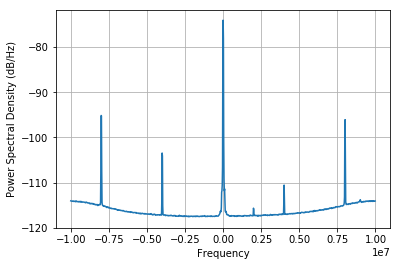

1

In [2]:
iq.sampleRate = 20e6

file1 = "./data/5.activity-1.npy"

duration1 = iq.getTimeDuration(file1, fileType="npy")                      
print("Time duration of the cfile file: " + str(duration1) + " seconds")

data1= np.load(file1, mmap_mode='r')
length = len(data1)
print("Number of samples in NumPy data: " + str(length))

iq.plotPSD(data1)

#### Visualization of file 2

Time duration of the cfile file: 0.5 seconds
Number of samples in NumPy data: 10000000


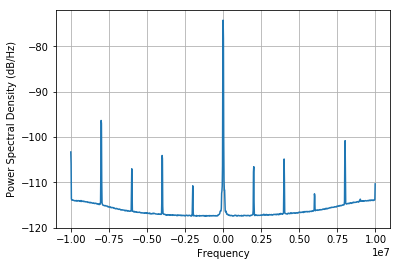

1

In [3]:
file2 = "./data/5.activity-2.npy"

duration2 = iq.getTimeDuration(file2, fileType="npy")                      
print("Time duration of the cfile file: " + str(duration2) + " seconds")

data2= np.load(file2, mmap_mode='r')
length = len(data2)
print("Number of samples in NumPy data: " + str(length))

iq.plotPSD(data2)

#### Visualization of file 3

Time duration of the cfile file: 0.5 seconds
Number of samples in NumPy data: 10000000


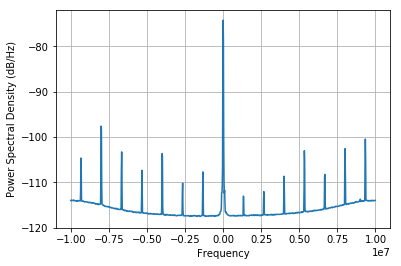

1

In [4]:
file3 = "./data/5.activity-3.npy"

duration3 = iq.getTimeDuration(file3, fileType="npy")                      
print("Time duration of the cfile file: " + str(duration3) + " seconds")

data3= np.load(file3, mmap_mode='r')
length = len(data3)
print("Number of samples in NumPy data: " + str(length))

iq.plotPSD(data3)

#### Visualization of file 4

Time duration of the cfile file: 0.5 seconds
Number of samples in NumPy data: 10000000


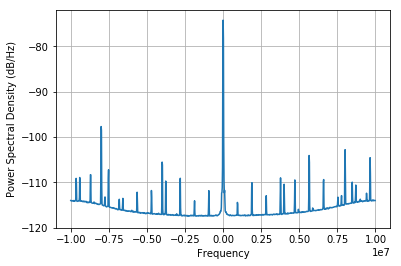

1

In [5]:
file4 = "./data/5.activity-4.npy"

duration4 = iq.getTimeDuration(file4, fileType="npy")                      
print("Time duration of the cfile file: " + str(duration4) + " seconds")

data4= np.load(file4, mmap_mode='r')
length = len(data4)
print("Number of samples in NumPy data: " + str(length))

iq.plotPSD(data4)

#### Visualization of file 5

Time duration of the cfile file: 0.5 seconds
Number of samples in NumPy data: 10000000


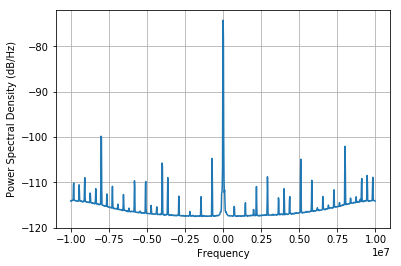

1

In [6]:
file5 = "./data/5.activity-5.npy"

duration5 = iq.getTimeDuration(file5, fileType="npy")                      
print("Time duration of the cfile file: " + str(duration5) + " seconds")

data5= np.load(file5, mmap_mode='r')
length = len(data5)
print("Number of samples in NumPy data: " + str(length))

iq.plotPSD(data5)

### 2. Generating the Training Dataset

Now, it's time to generate the training datasets for a machine learning model. Similar to the previous Jupyter-Notebook, we have to extract smaller segments of data from each file using a sliding window and then convert each segment into a feature vector. For data segment extraction, this time we have to use the NumPy array indexing since our data are not in cFile format to use the **getSegmentData()** function.

Let's take one segment from one file to test if it works.

In [7]:
sliding_window_size = 0.01 # this is time in seconds

sample_offset = 0 # this is in samples

duration = iq.getTimeDuration(file1, fileType="npy") # this is time in seconds 

total_samples = int(iq.sampleRate * duration) # this is in samples
samples_per_window = int(iq.sampleRate * sliding_window_size) # this is in samples
print("Total samples in the NumPy file: " + str(total_samples))
print("Samples per window: " + str(samples_per_window))

start = sample_offset # starting index of the NumPy array where the segment begins
end = sample_offset + samples_per_window # ending index of the NumPy array where the segment ends.
segment = data1[start:end] # extracting the segment

Total samples in the NumPy file: 10000000
Samples per window: 200000


Noe, let's generate the feature vector and visualize it to have an idea how this is done. This time, we set the feature vector length to 1000 since this is real EM signal is complex compared to the simple signal we used in the previous Jupyter-Notebook.

1000


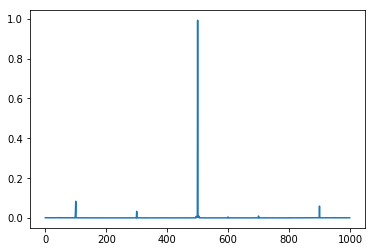

In [8]:
feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
print(len(feature_vector))

plt.figure()
plt.plot(feature_vector)
plt.show()

#### Building the X Matrix and y Vector

In [9]:
X = []
Y = []

In [10]:
sample_offset = 0

while (sample_offset + samples_per_window) < total_samples:
    start = sample_offset
    end = sample_offset + samples_per_window
    segment = data1[start:end]
    #print(segment)
    
    feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
  
    X.extend([feature_vector])
    Y.append("Class 1")
    
    sample_offset = sample_offset + samples_per_window

In [11]:
sample_offset = 0

while (sample_offset + samples_per_window) < total_samples:
    start = sample_offset
    end = sample_offset + samples_per_window
    segment = data2[start:end]
    #print(segment)
    
    feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
  
    X.extend([feature_vector])
    Y.append("Class 2")
    
    sample_offset = sample_offset + samples_per_window

In [12]:
sample_offset = 0

while (sample_offset + samples_per_window) < total_samples:
    start = sample_offset
    end = sample_offset + samples_per_window
    segment = data3[start:end]
    #print(segment)
    
    feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
  
    X.extend([feature_vector])
    Y.append("Class 3")
    
    sample_offset = sample_offset + samples_per_window

In [13]:
sample_offset = 0

while (sample_offset + samples_per_window) < total_samples:
    start = sample_offset
    end = sample_offset + samples_per_window
    segment = data4[start:end]
    #print(segment)
    
    feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
  
    X.extend([feature_vector])
    Y.append("Class 4")
    
    sample_offset = sample_offset + samples_per_window

In [14]:
sample_offset = 0

while (sample_offset + samples_per_window) < total_samples:
    start = sample_offset
    end = sample_offset + samples_per_window
    segment = data5[start:end]
    #print(segment)
    
    feature_vector = ml.getFeatureVector(segment, featureVectorSize=1000)
  
    X.extend([feature_vector])
    Y.append("Class 5")
    
    sample_offset = sample_offset + samples_per_window

### 3. Training and Testing Machine Learning Model

In [15]:
clf = ml.createClassifier()
ml.trainAndTest(clf, X, Y)

[[11  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0  8]]
             precision    recall  f1-score   support

    Class 1       1.00      1.00      1.00        11
    Class 2       1.00      1.00      1.00        11
    Class 3       1.00      1.00      1.00        16
    Class 4       1.00      1.00      1.00        16
    Class 5       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        62

